# Задача 1. Найди распределение в генеральной совокупности

##1. (blue, баллы: 1.5) Дана генеральная совокупность равновероятных исходов.

  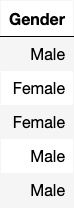

  Построй таблицу распределения пола в генеральной совокупности.   

**Решение**

In [3]:
import pandas as pd

# Gender
# Male
# Female
# Female
# Male
# Male

df = pd.DataFrame({'Gender': ['Male', 'Female', 'Female', 'Male', 'Male']})
df_distr = df['Gender'].value_counts(normalize=True).to_frame()
df_distr.style.format(precision=2).set_caption(
    "Распределение пола в генеральной совокупности")

,proportion
Gender,
Male,0.60
Female,0.40


## 2. (red, баллы: 1.5) Дана генеральная совокупность равновероятных исходов.

  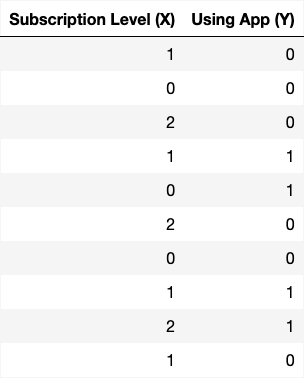

  Найди распределение и покажи в виде «одномерной» таблицы:
  - Два столбца: (X,Y) и Prob.
  - Строка соответствует паре значений $(X,Y)$ и вероятности такой пары.

  Найди распределение и покажи в виде «двумерной» таблицы:
  - Столбец соответствует значению $X$.
  - Строка соответствует значению $Y$.
  - В ячейке — вероятность соответствующей пары $(X,Y)$.

**Решение**

In [8]:
df = pd.DataFrame({
    'Subscription Level (X)': [1, 0, 2, 1, 0, 2, 0, 1, 2, 1],
    'Using App (Y)': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0]
})

In [12]:
#  В одномерном
df_distr1 = df.copy()
df_distr1['Pair Value (X, Y)'] = df_distr1.apply(lambda x: f'({x["Subscription Level (X)"]}, {x["Using App (Y)"]})',
                                                 axis=1)
df_distr1 = df_distr1['Pair Value (X, Y)'].value_counts(normalize=True).to_frame()
df_distr1.style.format(precision=2).set_caption(
    "Распределение пары в генеральной совокупности")

,proportion
"Pair Value (X, Y)",
"(1, 0)",0.20
"(0, 0)",0.20
"(2, 0)",0.20
"(1, 1)",0.20
"(0, 1)",0.10
"(2, 1)",0.10


In [10]:
# В двумерном
df_distr2 = df.copy()
df_distr2 = df_distr2.groupby(['Subscription Level (X)', 'Using App (Y)']).size().unstack().fillna(0)
df_distr2 = df_distr2 / df_distr2.sum().sum()
df_distr2.style.format(precision=2).set_caption(
    "Распределение пары в генеральной совокупности")

Using App (Y),0,1
Subscription Level (X),,
0,0.20,0.10
1,0.20,0.20
2,0.20,0.10


##3. (blue, баллы: 1.5) Для генеральной совокупности равновероятных исходов [05_age_distribution.csv](https://raw.githubusercontent.com/zalig/cu-datasets/main/05_age_distribution.csv) построй таблицу распределения.

**Решение**

## 4. (black, баллы: 1.5) Для генеральной совокупности равновероятных исходов [05_age_gender_distribution.csv](https://raw.githubusercontent.com/zalig/cu-datasets/main/05_age_gender_distribution.csv) построй «двумерную» таблицу распределения:
  
    - Строка — пол.
    - Столбец — возрастная группа.
    - В ячейке — вероятность для случайного равновероятно взятого человека иметь заданный пол и возрастную группу.

**Решение**

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/05_age_gender_distribution.csv')

df_distr = df.groupby(['Gender', 'Age']).size().unstack().fillna(0)
df_distr = df_distr / df_distr.sum().sum()
df_distr.style.format(precision=2).set_caption(
    "Распределение людей по признакам в генеральной совокупности")

Age,25+,<25
Gender,,
Female,0.11,0.37
Male,0.12,0.40


# Задача 2. Проверь независимость событий





## 1. (blue, баллы: 1) Дана генеральная совокупность равновероятных исходов.

  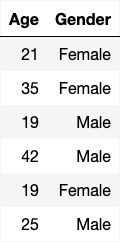

 Проверь независимость событий:

  - Age > 20 и Gender == Male;
  - Age > 20 и Age > 30.

**Решение**

In [15]:
df = pd.DataFrame(
    {
        'Age': [21, 35, 19, 42, 19, 25],
        'Gender': ['Female', 'Female', 'Male', 'Male', 'Female', 'Male']
    }
)

p_uni = ((df['Age'] > 20) & (df['Gender'] == 'Male')).mean()
p_1 = (df['Gender'] == 'Male').mean()
p_2 = (df['Age'] > 20).mean()

print(p_uni)
print(p_1)
print(p_2)
print('Независимы' if p_uni == p_2 * p_1 else 'Зависимы')

0.3333333333333333
0.5
0.6666666666666666
Независимы


In [16]:
p_uni = ((df['Age'] > 20) & (df['Age'] > 30)).mean()
p_1 = (df['Age'] > 30).mean()
p_2 = (df['Age'] > 20).mean()

print(p_uni)
print(p_1)
print(p_2)
print('Независимы' if p_uni == p_2 * p_1 else 'Зависимы')

0.3333333333333333
0.3333333333333333
0.6666666666666666
Зависимы


## 2. (blue, баллы: 1) Дано распределение возраста и числа просмотренных видео в генеральной совокупности.

  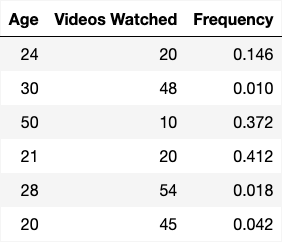

 Проверь независимость событий Videos Watched > 40 и Age < 25.

In [23]:
df = pd.DataFrame(
    {
        'Age': [24, 30, 50, 21, 28, 20],
        'Video Watched': [20, 48, 10, 20, 54, 45],
        'Frequency': [0.146, 0.010, 0.372, 0.412, 0.018, 0.042]
    }
)

p_uni = df[(df['Age'] < 25) & (df['Video Watched'] > 40)]['Frequency'].sum()
p_1 = df[df['Age'] < 25]['Frequency'].sum()
p_2 = df[df['Video Watched'] > 40]['Frequency'].sum()

print(p_uni)
print(p_1)
print(p_2)
print('Независимы' if p_uni == p_2 * p_1 else 'Зависимы')

0.042
0.6
0.07
Независимы


**Решение**

# Задача 3.  Приведи примеры случайных выборок из распределения






## 1. (blue, баллы: 1) Для заданной генеральной совокупности [05_gender_distribution.csv](https://raw.githubusercontent.com/zalig/cu-datasets/main/05_gender_distribution.csv) приведи пример простой случайной выборки размера 2 и найди вероятности:
  - получить эту конкретную выборку;
  - получить эти значения пола в случайной равновероятной выборке.
  
  Для ответа на какой из этих вопросов достаточно было знать только распределение в генеральной совокупности?



**Решение**

In [33]:
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/05_gender_distribution.csv')

sample = df.head(2)
sample

,CustomerId,Gender
0,id1,Female
1,id2,Female


In [29]:
# Задача 1
N = df.shape[0]
p = 1 / (N * (N - 1))
print('Вероятность получить эту конкретную выборку:', p)

Вероятность получить эту конкретную выборку: 4.008016032064128e-06


In [30]:
df['Gender'].value_counts(normalize=True).to_frame().T

Gender,Male,Female
proportion,0.6,0.4


In [35]:
# Задача 2
male_prop = 0.6
female_prop = 0.4

# В случайной выборке пол: Female и Female
prob_female_female = female_prop * female_prop
print('Вероятность получения выборки с такими полами:', prob_female_female)

Вероятность получения выборки с такими полами: 0.16000000000000003


## 2. (blue, баллы: 1) Дано распределение пола в генеральной совокупности.

  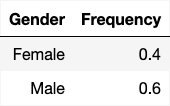

  Придумай два разных примера выборок размера 2 из генеральной совокупности выше, укажи значения характеристики «пол» в этих выборках.
  
  Для каждого примера найди вероятность, что в случайной выборке получаются именно такие значения характеристики пола.

**Решение**

In [105]:
male_prop = 0.6
female_prop = 0.4

# Пример 1: Male и Female
prob_male_female = male_prop * female_prop
print('Вероятность получения выборки с полами Male и Female:', prob_male_female)

# Пример 2: Male и Male
prob_male_male = male_prop * male_prop
print('Вероятность получения выборки с полами Male и Male:', prob_male_male)


Вероятность получения выборки с полами Male и Female: 0.24
Вероятность получения выборки с полами Male и Male: 0.36


# Задача 4. Приведи примеры распределений по заданной выборке

Задана выборка: 2, 2, 7.

 ## 1. (blue, баллы: 1) Придумай распределение с как минимум тремя разными значениями и ненулевыми вероятностями, из которого эта выборка могла появиться как простая случайная выборка. Найди вероятность появления этой выборки из придуманного вами распределения.
 ## 2. (blue) Придумай распределение с двумя возможными значениями, из которого эта выборка могла появиться как простая случайная выборка. Найди вероятность появления этой выборки.
 ## 3. (red) Какое из двух предложенных распределений «лучше объясняет» эту выборку и почему?

### Задача 1

Пусть распределение будет:

P(2) = 0.2

P(3) = 0.3

P(7) = 0.5

In [106]:
p_2 = 0.2
p_3 = 0.3
p_7 = 0.5

p = p_2 * p_2 * p_7
print('Вероятность получения выборки:', p)

Вероятность получения выборки: 0.020000000000000004


### Задача 2

Пусть распределение будет:

P(2) = 0.5

P(7) = 0.5

In [107]:
p_2 = 0.5
p_7 = 0.5

p = p_2 * p_2 * p_7
print('Вероятность получения выборки:', p)

Вероятность получения выборки: 0.125


### Задача 3

Вероятность появления выборки из второго распределения больше, так как она ближе к реальным значениям выборки.

# Задача 5. Похожа ли выборка на простую случайную?

Ниже приведены примеры ситуаций из жизни. Для каждой ситуации укажи, что в контексте ситуации является генеральной совокупностю, а что — выборкой.

Прокомментируй каждую выборку: можно ли о ней думать как о простой случайной хотя бы приблизительно или нет и почему.

## 1. (blue, баллы: 0.5) Тем клиентам, которые указали на сайте, что хотят отставить отзыв за купон, позвонили операторы колл-центра и опросили их.



**Решение**

Выборка не является простой случайной, так как клиенты, которые указали на сайте, что хотят оставить отзыв за купон, могут быть более склонны к позитивному отзыву, чем остальные клиенты.

## 2. (blue, баллы: 0.5) Из списка всех клиентов были случайно равновероятно выбраны 100 клиентов, которым позвонили операторы колл-центра и опросили их.

**Решение**

Выборка является простой случайной, так как клиенты были выбраны случайным образом. Это лучше отобразит картину отношения клиентов к услугам.

# Задача 6. Сгенерируй выборки в Python

Сравни, как работают два метода получения случайных выборок:
 - простая случайная выборка;
 - стратифицированная случайная выборка.

Дан датасет [arc.csv](https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv) из кейса [«Ковчег»](https://github.com/zalig/cu-datasets/raw/main/case_5_arc.pdf).

На всей генеральной совокупности клиентов проводилась  рекламная кампания A. Для этой кампании известна конверсия. Конверсия — это доля купивших продукт среди всех, кому он рекламировался.

Следующие рекламные кампании B, C, D, E,... предлагается сначала пробно запускать на выборках.

Нужен метод получения выборок.
Желательно — как можно более репрезенативных.

В качестве способа пронаблюдать репрезентативность предлагаем посчитать и сравнить конверсию рекламной кампании A:
- по выборке;
- по генеральной совокупности.

Если метод получения выборок хорош:
- выборка не будет постоянно завышать или постоянно занижать конверсию;
- ошибка приближения часто будет маленькой и редко большой.

## 1. (blue, баллы: 1) Сделай симуляцию метода простой случайной выборки. Повтори N=10 000 раз:

  - Сформировать выборку.
  - Посчитать по выборке конверсию.

После этого один раз нужно построить гистограмму для полученных N выборочных конверсий, отметив на оси настоящую конверсию из генеральной совокупности.




**Решение**

In [108]:
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/ark.csv')
df.head()

,Id,Age,Gender,Purchased
0,id1,<25,Male,No
1,id2,<25,Female,No
2,id3,<25,Female,Yes
3,id4,<25,Male,No
4,id5,25+,Male,No


In [123]:
conversion_original = (df['Purchased'] == 'Yes').mean()
conversion_original

np.float64(0.168175)

In [117]:
len(df)

80000

### Случайная выборка

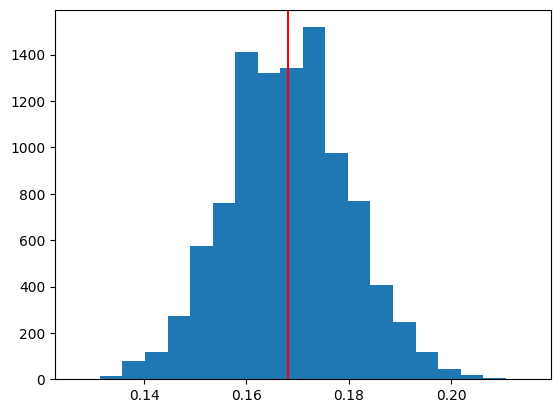

In [128]:
import matplotlib.pyplot as plt

N = 10_000
conversions = []

for i in range(N):
    sample = df.sample(1_000)
    conversion = (sample['Purchased'] == 'Yes').mean()
    conversions.append(conversion)

plt.hist(conversions, bins=20)
plt.axvline(conversion_original, color='red')

### Стратифицированная выборка

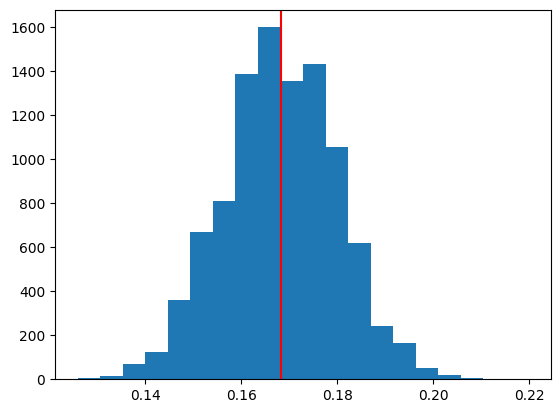

In [124]:
def stratified_sample(df, strata_col, frac):
    groups = df.groupby(strata_col)
    sample = pd.DataFrame()

    for _, group in groups:
        stratum_sample = group.sample(frac=frac, replace=False)
        sample = pd.concat([sample, stratum_sample])

    return sample


conversions = []
N = 10_000

for _ in range(N):
    df_sample = stratified_sample(df, ['Age', 'Gender'], 1_000 / len(df))
    sample_conversion = (df_sample['Purchased'] == 'Yes').mean()
    conversions.append(sample_conversion)

plt.hist(conversions, bins=20)
plt.axvline(conversion_original, color='red')

## 2. (red, баллы: 1.5) Сделайте симуляцию метода стратифицированной случайной выборки. Повтори N=10 000 раз:

  - Сформировать выборку.
  - Посчитать по выборке конверсию.

После этого один раз нужно построить гистограмму для полученных N выборочных конверсий, отметив на оси настоящую конверсию из генеральной совокупности.



**Решение**

In [111]:
df['Age'].value_counts()


Age
<25    61092
25+    18908
Name: count, dtype: int64

In [112]:
# Concat Age and Gender columns


Age
<25    0.76365
25+    0.23635
Name: proportion, dtype: float64

# Задача 7. Найди вероятность объединения событий


##1. (red, баллы: 1) Известно, что у 60% людей есть смартфон, у 35% есть телевизор, а у 10% — и смартфон, и телевизор. Сколько процентов людей имеют хотя бы одно из этих устройств?



**Решение**

## 2. (red, баллы: 1) У здорового человека тест A показывает болезнь с вероятностью 10%, тест B — тоже с вероятностью 10%, результаты тестов независимы. После проведения двух тестов у здорового человека с какой вероятностью хотя бы один из них покажет болезнь?

**Решение**

## 3. (black, баллы: 0.5) Реши предыдущую задачу:
- для 3 тестов;
- для 10 тестов.

Что происходит по мере роста числа тестов с вероятностью тестом обнаружить болезнь у здорового человека?

Объясни, почему, если кому-то показывают тест с положительным результатом, доверие к тесту зависит ещё и от того, сколько суммарно проводилось тестов, результат которых не показывали.

**Решение**

# Задача 8. Найди совместное распределение и примени его



Под выборкой в этой задаче всегда имеется в виду случайная выборка из распределения.

Дано распределение одного наблюдения $X_i$.

  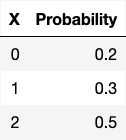
  


## 1. (black, баллы: 1.5) Найди распределение выборки двух величин $(X_1,X_2)$ в «одномерной» табличке пар.

**Решение**

In [143]:
df = pd.DataFrame({'X': [0, 1, 2, ], 'Probability': [.2, .3, .5]})

df_xy = df.merge(df, how='cross')
df_xy['Probability'] = df_xy['Probability_x'] * df_xy['Probability_y']
df_xy = df_xy.rename(columns={'X_x': 'X1', 'X_y': 'X2'})

df_xy


,X1,Probability_x,X2,Probability_y,Probability
0,0,0.2,0,0.2,0.04
1,0,0.2,1,0.3,0.06
2,0,0.2,2,0.5,0.10
3,1,0.3,0,0.2,0.06
4,1,0.3,1,0.3,0.09
5,1,0.3,2,0.5,0.15
6,2,0.5,0,0.2,0.10
7,2,0.5,1,0.3,0.15
8,2,0.5,2,0.5,0.25


## 2. (black, баллы: 1.5) Найди распределение выборочного среднего $\bar{X}$ для выборки размера 2.



**Решение**

In [135]:
df = pd.DataFrame({'X': [0, 1, 2, ], 'Probability': [.2, .3, .5]})

df_xy = df.merge(df, how='cross')
df_xy['Probability'] = df_xy['Probability_x'] * df_xy['Probability_y']
df_xy['Mean'] = (df_xy['X_x'] + df_xy['X_y']) / 2

df_xy.groupby('Mean')['Probability'].sum()

Mean
0.0    0.04
0.5    0.12
1.0    0.29
1.5    0.30
2.0    0.25
Name: Probability, dtype: float64

## 3. (black, баллы: 1.5) Найди распределение трёх величин $(X_1,X_2,X_3)$ в «одномерной» табличке троек.



**Решение**

In [146]:
df = pd.DataFrame({'X': [0, 1, 2, ], 'Probability': [.2, .3, .5]})

df_xyz = df.merge(df, how='cross').merge(df, how='cross')
df_xyz['Probability'] = df_xyz['Probability_x'] * df_xyz['Probability_y'] * df_xyz['Probability']
del df_xyz['Probability_x']
del df_xyz['Probability_y']
df_xyz = df_xyz.rename(columns={'X_x': 'X1', 'X_y': 'X2', 'X': 'X3'})
    
df_xyz

,X1,X2,X3,Probability
0,0,0,0,0.008
1,0,0,1,0.012
2,0,0,2,0.020
3,0,1,0,0.012
4,0,1,1,0.018
5,0,1,2,0.030
6,0,2,0,0.020
7,0,2,1,0.030
8,0,2,2,0.050
9,1,0,0,0.012


## 4. (black, баллы: 1.5) Найди распределение выборочного среднего $\bar{X}$ для выборки размера 3.

**Решение**

In [161]:
df = pd.DataFrame({'X': [0, 1, 2, ], 'Probability': [.2, .3, .5]})
df_xyz = df.merge(df, how='cross').merge(df, how='cross')

df_xyz['Probability'] = df_xyz['Probability_x'] * df_xyz['Probability_y'] * df_xyz['Probability']
df_xyz['Mean'] = (df_xyz['X_x'] + df_xyz['X_y'] + df_xyz['X']) / 3

df_xyz = df_xyz.groupby('Mean')['Probability'].sum()x
df_xyz

Mean
0.000000    0.008
0.333333    0.036
0.666667    0.114
1.000000    0.207
1.333333    0.285
1.666667    0.225
2.000000    0.125
Name: Probability, dtype: float64

# Задача 9. Примени геометрический подход к вероятности




## 1. (black, баллы: 1) Используя геометрический подход к вероятности, найди вероятность того, что для случайной точки на отрезке расстояние до левого края меньше половины расстояния до правого края.

**Решение**

## 2. (black, баллы: 1) Используя геометрический подход к вероятности, найди вероятность того, что, если разрезать отрезок случайно на 3 части, из частей получится сложить треугольник.

**Решение**